In [34]:
from functools import partial
import numpy as np
from math import sqrt, log, pi, exp
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

In [35]:
FACTOR_LOGNORMAL = 1.0 / ( sqrt(2.0*pi))

def lognormal(r, ksi=1.0, lambda_=1.0):
    
    par2 = -0.5*((log(r) - lambda_)/ksi)**2     
    
    return  par1 * exp(par2)

def sigma(mu, delta):
    return mu * delta

def ksi(delta):
    return sqrt(log(1.0+delta**2))

def lambda_(mu, ksi):
    return  log(mu) - 0.5 * ksi**2


def paramenters_lognormal(mu, delta):
    k = ksi(delta)    
    return sigma(mu, delta), k, lambda_(mu, k)

In [36]:
def tipoI(x, alpha, u):
    par1 = exp(-alpha * (x - u))
    return alpha*exp(-par1)*par1


def alpha(sig):
    return (pi/sqrt(6))*(1.0/sig)

def u(mu, alpha):
    return mu - 0.5772/alpha

# U1 - Modulo de Elasticidade do Cimento: LogNormal

In [120]:
mu1, delta1 = 1.19, 0.1

sigma1, ksi1, lambda1 =  paramenters_lognormal(mu1, delta1)

print(f'sigma = {sigma1:.3f} ksi = {ksi1:.5f} lambda = {lambda1:.5f}')

sigma = 0.119 ksi = 0.09975 lambda = 0.16898


In [121]:
x = np.arange(0.01, mu1+10*sigma1, 0.01)
p = np.arange(0.0, 1.0, 0.001)

# 
# scale = exp μ, where μ is the mean of the log of the variate
# s = the standard deviation of the log of the variate

f1 = partial(lognorm.pdf, s=ksi1, scale=exp(lambda1))
F1 = partial(lognorm.cdf, s=ksi1, scale=exp(lambda1))
IF1 = partial(lognorm.ppf, s=ksi1, scale=exp(lambda1))

pdf = f1(x)
cdf = F1(x)
icdf = IF1(p)

In [122]:
def graph_pdf(x, pdf, mu, xlabel, ylabel):
    
    plt.figure(figsize=(8, 4))

    plt.plot(x, pdf, label='dist')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.axvline(x = mu, color = 'r', label = 'Media')

    plt.legend()

    plt.show()
    

def graph_cdf(x, cdf, mu, xlabel, ylabel):

    plt.figure(figsize=(8, 4))
    
    plt.plot(x, cdf, label='dist')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.axvline(x = mu, color = 'r', label = 'Media')

    plt.legend()

    plt.show()
    
def graph_icdf(x, icdf, mu, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.plot(p, icdf, label='Função inversa Acumulada')
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.axhline(y = mu, color = 'r', label = 'Media')

    plt.legend()

    plt.show()

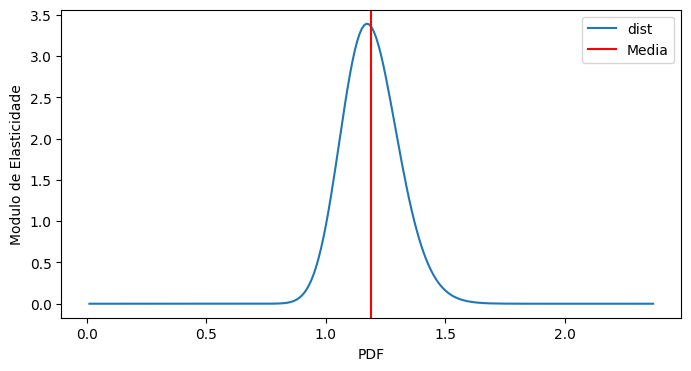

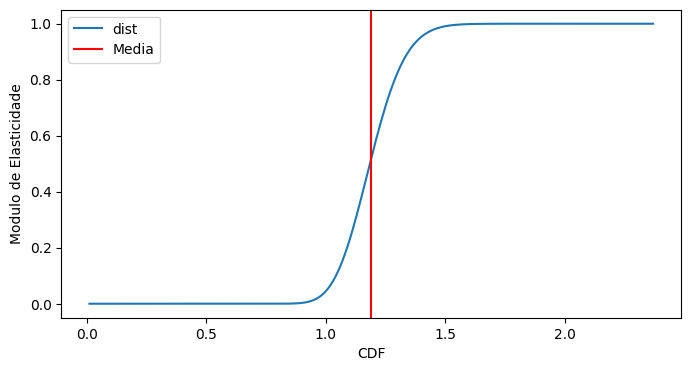

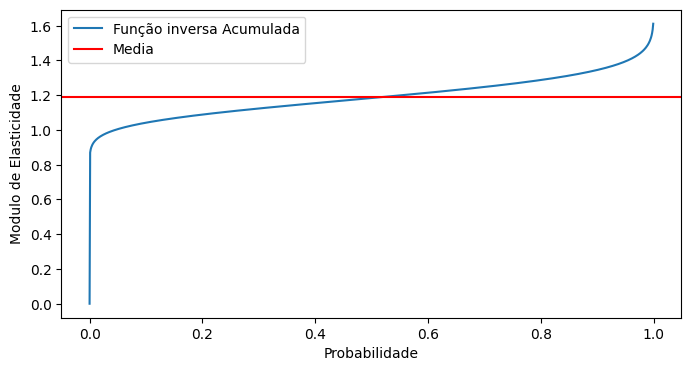

In [125]:
graph_pdf(x, pdf, mu1, 'Modulo de Elasticidade', 'PDF')
graph_cdf(x, cdf, mu1, 'Modulo de Elasticidade', 'CDF')
graph_icdf(x, icdf, mu1, 'Modulo de Elasticidade', 'Probabilidade')

# U2 - Coeficiente de Poisson do Cimento: LogNormal

In [126]:
mu2, delta2 = 1.8, 0.1

sigma2, ksi2, lambda2 =  paramenters_lognormal(mu2, delta2)

print(f'sigma = {sigma2:.3f} ksi = {ksi2:.5f} lambda = {lambda2:.5f}')

sigma = 0.180 ksi = 0.09975 lambda = 0.58281


In [127]:
x = np.arange(0.01, mu2+10*sigma2, 0.01)
p = np.arange(0.0, 1.0, 0.001)

# 
# scale = exp μ, where μ is the mean of the log of the variate
# s = the standard deviation of the log of the variate

f2 = partial(lognorm.pdf, s=ksi2, scale=exp(lambda2))
F2 = partial(lognorm.cdf, s=ksi2, scale=exp(lambda2))
IF2 = partial(lognorm.ppf, s=ksi2, scale=exp(lambda2))

pdf = f2(x)
cdf = F2(x)
icdf = IF2(p)

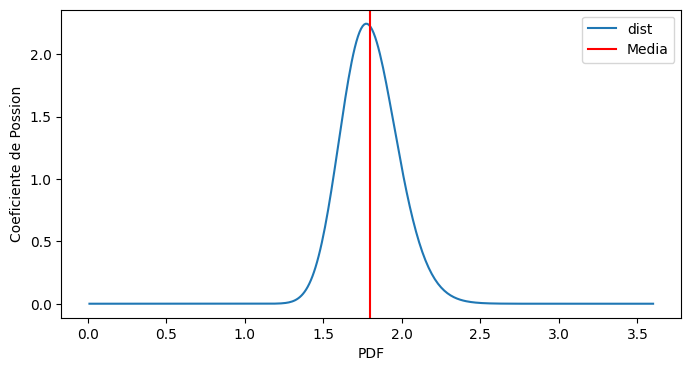

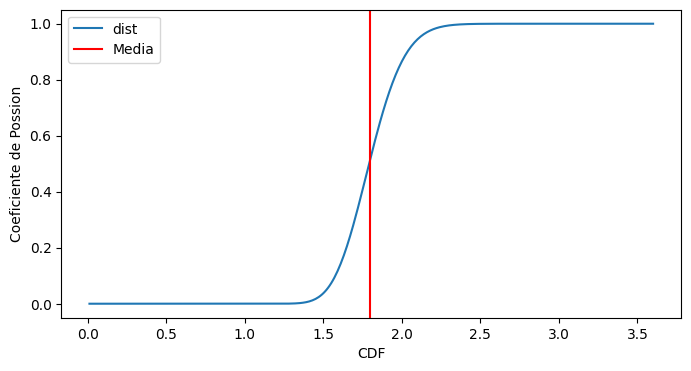

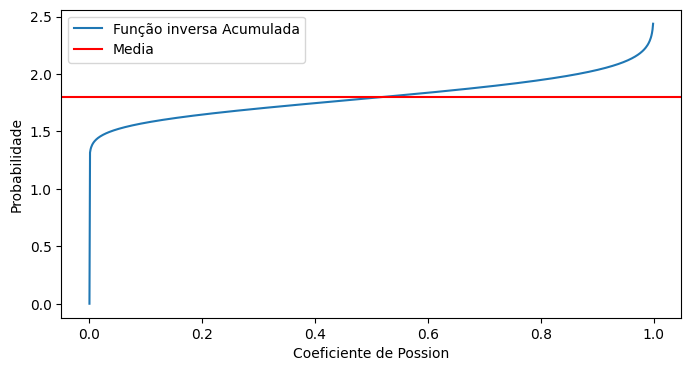

In [128]:
graph_pdf(x, pdf, mu2, 'Coeficiente de Possion', 'PDF')
graph_cdf(x, cdf, mu2, 'Coeficiente de Possion', 'CDF')
graph_icdf(x, icdf, mu2, 'Probabilidade', 'Coeficiente de Possion')

# U3 - Coesão: Normal

In [129]:
mu3, delta3 = 1.97, 0.1

sigma3 = sigma(mu3, delta3)

print(f'sigma = {sigma3:.3f}')

sigma = 0.197


In [130]:
f3 = partial(norm.pdf, loc=mu3, scale=sigma3)
F3 = partial(norm.cdf, loc=mu3, scale=sigma3)
IF3 = partial(norm.ppf, loc=mu3, scale=sigma3)

x = np.arange(0.01, mu3+10*sigma3, 0.01)
p = np.arange(0.0, 1.0, 0.001)

pdf = f3(x)
cdf = F3(x)
icdf = IF3(p)

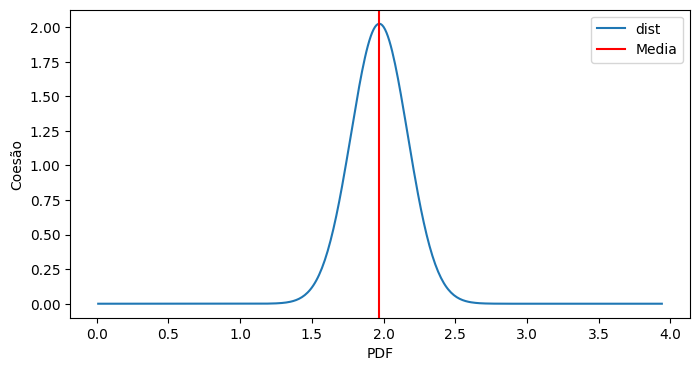

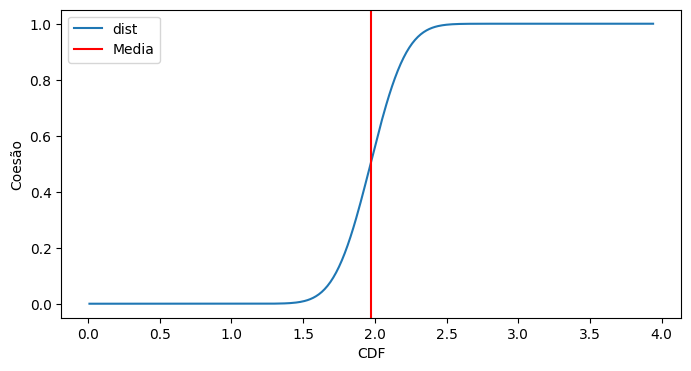

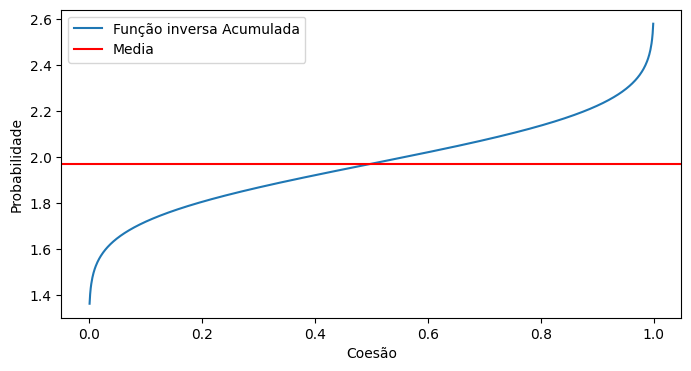

In [131]:
graph_pdf(x, pdf, mu3, 'Coesão', 'PDF')
graph_cdf(x, cdf, mu3, 'Coesão', 'CDF')
graph_icdf(x, icdf, mu3, 'Probabilidade', 'Coesão')

# U4 - Pressão interna: Tipo I

In [132]:
mu4, delta4 = 6.8, 0.1

sigma4 = sigma(mu4, delta4)

alpha4 = alpha(sigma4)

uu4 = u(mu4, alpha4)
    
print(f'sigma = {sigma4:.3f} alpha = {alpha4:.3f} u = {uu4:.3f}')    

sigma = 0.680 alpha = 1.886 u = 6.494


In [133]:
from scipy.stats import gumbel_r

def tipoI(x, alpha, u):
    xp = alpha * (x - u)
    return alpha*exp(-(xp + exp(-xp)))

def ctipoI(x, alpha, u):
    par1 = exp(-alpha * (x - u))
    return exp(-par1)


def ictipoI(p, alpha, u):
    par1 = -log(-log(p))
    return par1 / alpha + u

def alpha(sig):
    return (pi/sqrt(6))*(1.0/sig)

def u(mu, alpha):
    return mu - 0.5772/alpha


f4 = partial(gumbel_r.pdf, loc=uu4, scale=1/alpha4)
F4 = partial(gumbel_r.cdf, loc=uu4, scale=1/alpha4)
IF4 = partial(gumbel_r.ppf, loc=uu4, scale=1/alpha4)

# f4 = partial(tipoI, alpha=alpha4, u=uu4)
# F4 = partial(ctipoI, alpha=alpha4, u=uu4)
# IF4 = partial(ictipoI, alpha=alpha4, u=uu4)

x = np.arange(0.01, mu4+10*sigma4, .01)
p = np.arange(0.0001, 1.0, 0.001)

pdf = [f4(xi) for xi in x]
cdf = [F4(xi) for xi in x]
icdf = [IF4(pi) for pi in p]


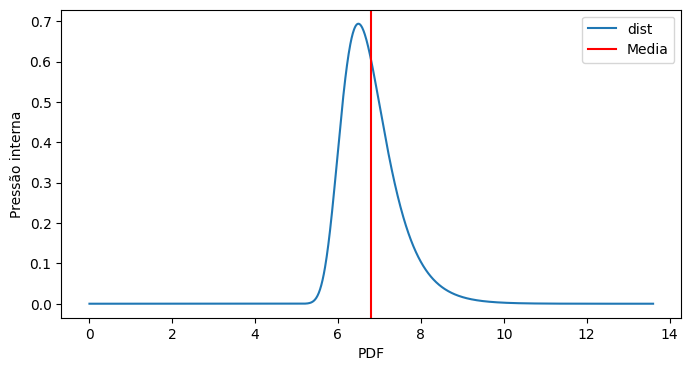

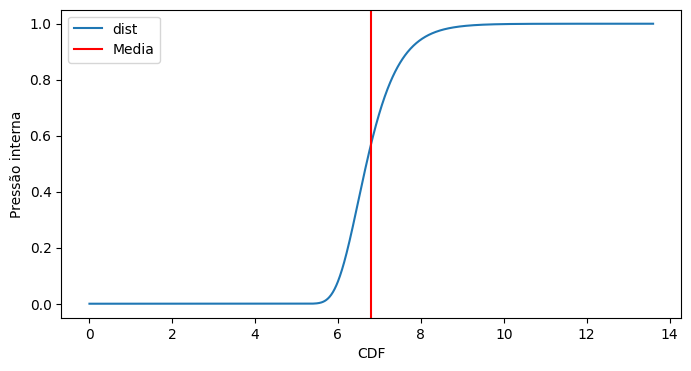

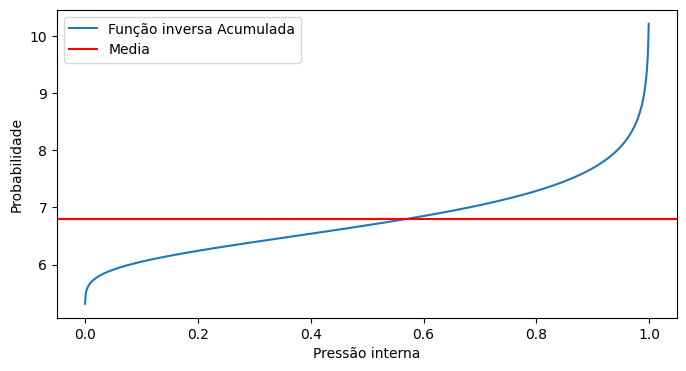

In [134]:
graph_pdf(x, pdf, mu4, 'Pressão interna', 'PDF')
graph_cdf(x, cdf, mu4, 'Pressão interna', 'CDF')
graph_icdf(x, icdf, mu4, 'Probabilidade', 'Pressão interna')

# U5 - Temperatura Interna: Normal

In [135]:
mu5, delta5 = 291.639, 0.1

sigma5 = sigma(mu5, delta5)

print(f'sigma = {sigma5:.3f}')

sigma = 29.164


In [136]:
f5 = partial(norm.pdf, loc=mu5, scale=sigma5)
F5 = partial(norm.cdf, loc=mu5, scale=sigma5)
IF5 = partial(norm.ppf, loc=mu5, scale=sigma5)

x = np.arange(0.01, mu5+10*sigma5, 0.01)
p = np.arange(0.0, 1.0, 0.001)

pdf = f5(x)
cdf = F5(x)
icdf = IF5(p)

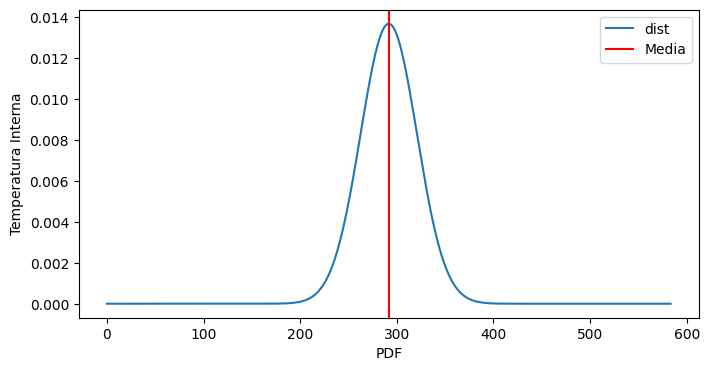

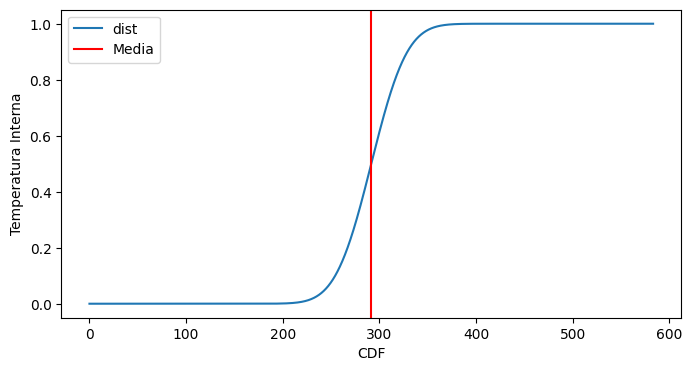

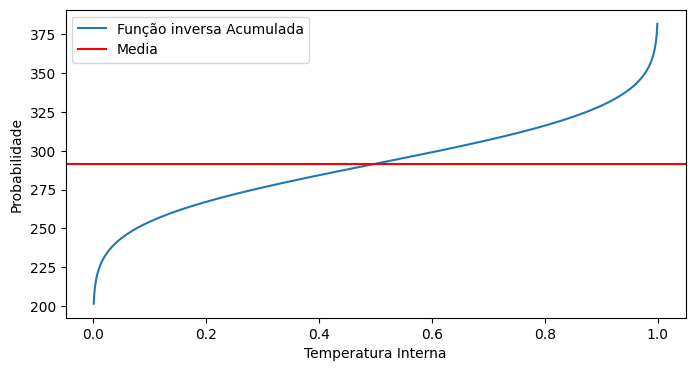

In [137]:
graph_pdf(x, pdf, mu5, 'Temperatura Interna', 'PDF')
graph_cdf(x, cdf, mu5, 'Temperatura Interna', 'CDF')
graph_icdf(x, icdf, mu5, 'Probabilidade', 'Temperatura Interna')

 # U6 - Ângulo de atrito interno: Lognormal

In [138]:
mu6, delta6 = 9.2, 0.1

sigma6, ksi6, lambda6 =  paramenters_lognormal(mu6, delta6)

print(f'sigma = {sigma6:.3f} ksi = {ksi6:.5f} lambda = {lambda6:.5f}')

sigma = 0.920 ksi = 0.09975 lambda = 2.21423


In [139]:
x = np.arange(0.01, mu6+10*sigma6, 0.01)
p = np.arange(0.0, 1.0, 0.001)

f6 = partial(lognorm.pdf, s=ksi6, scale=exp(lambda6))
F6 = partial(lognorm.cdf, s=ksi6, scale=exp(lambda6))
IF6 = partial(lognorm.ppf, s=ksi6, scale=exp(lambda6))

pdf = f6(x)
cdf = F6(x)
icdf = IF6(p)

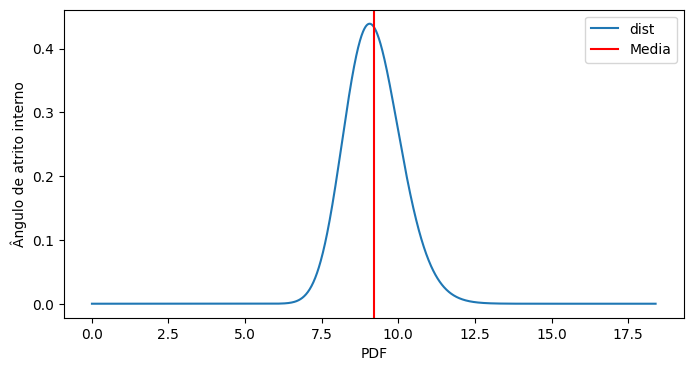

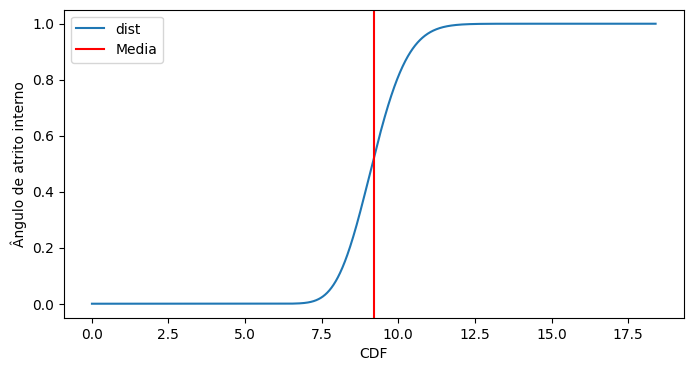

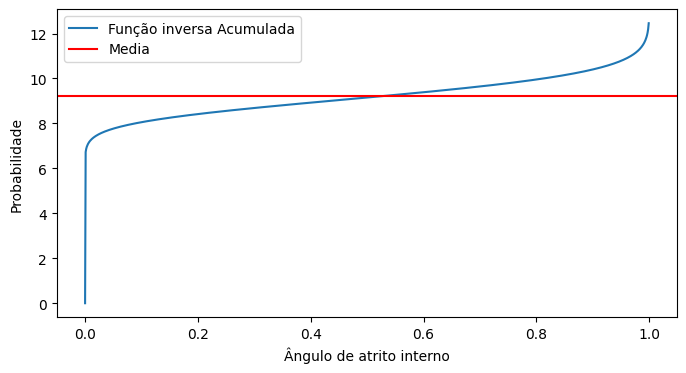

In [140]:
graph_pdf(x, pdf, mu6, 'Ângulo de atrito interno', 'PDF')
graph_cdf(x, cdf, mu6, 'Ângulo de atrito interno', 'CDF')
graph_icdf(x, icdf, mu6, 'Probabilidade', 'Ângulo de atrito interno')

# U7 - Coef. de Dilatação Térmica: Lognormal

In [141]:
mu7, delta7 = 6.4, 0.1

sigma7, ksi7, lambda7 =  paramenters_lognormal(mu7, delta7)

print(f'sigma = {sigma7:e} ksi = {ksi7:.5f} lambda = {lambda7:.5f}')

sigma = 6.400000e-01 ksi = 0.09975 lambda = 1.85132


In [142]:
x = np.arange(1e-9, mu7+10*sigma7, 0.01)
p = np.arange(0.0, 1.0, 0.001)

f7 = partial(lognorm.pdf, s=ksi7, scale=exp(lambda7))
F7 = partial(lognorm.cdf, s=ksi7, scale=exp(lambda7))
IF7 = partial(lognorm.ppf, s=ksi7, scale=exp(lambda7))

pdf = f7(x)
cdf = F7(x)
icdf = IF7(p)

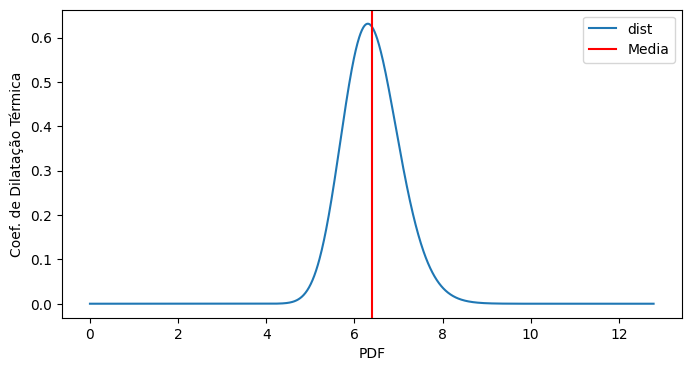

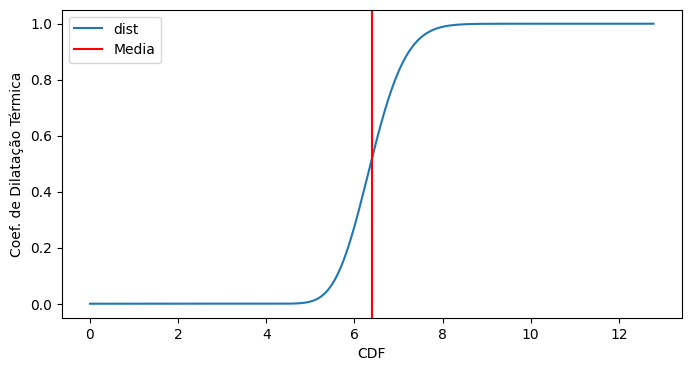

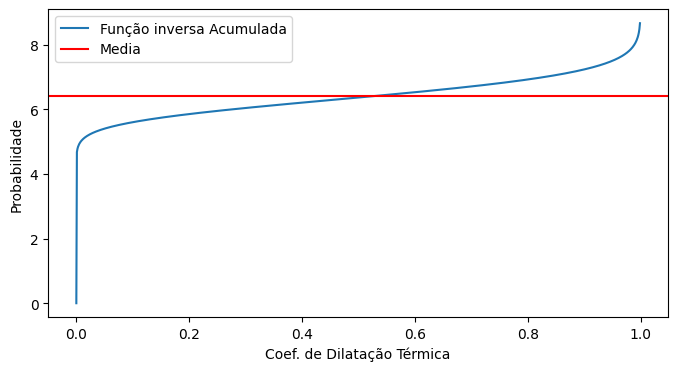

In [143]:
graph_pdf(x, pdf, mu7, 'Coef. de Dilatação Térmica', 'PDF')
graph_cdf(x, cdf, mu7, 'Coef. de Dilatação Térmica', 'CDF')
graph_icdf(x, icdf, mu7, 'Probabilidade', 'Coef. de Dilatação Térmica')

# FORMS LOOP

In [144]:
def print_array(name, array):
    print(name, end=' ')
    for a in array:
        print(f'{a:.3e}', end=' ')
    print()
        
def array_V(Ua, list_of_F):
    cholesky = np.ones_like(Ua) 
    
    vector = np.zeros_like(Ua)
    for i, (u, F) in enumerate(zip(Ua, list_of_F)):
        vector[i] = norm.ppf(F(u))    
        
    return cholesky * vector


def array_Y(Va):
    
    cholesky = np.ones_like(Va)      
        
    return cholesky * Va


def array_U(Vn, IFs):
    
    Y =  array_Y(Vn)
    
    vector = np.zeros_like(Y)
    
    for i, (y, IF) in enumerate(zip(Y, IFs)):
        vector[i] = IF(norm.cdf(y))

    return vector

def matrix_A(Ua, fs, Fs):
    
    A = np.zeros_like(Ua)
    
    for i, (U, f, F) in enumerate(zip(Ua, fs, Fs)):
        A[i]= f(U) / norm.pdf(norm.ppf(F(U)))  
    
    return A
    
    
def i_matrix_A(A):
    return 1.0/A

In [145]:
fs = (f1, f2, f3, f4, f5, f6, f7)
Fs = (F1, F2, F3, F4, F5, F6, F7)
IFs = (IF1, IF2, IF3, IF4, IF5, IF6, IF7, IF5)

## Iteração: 01

In [169]:
Ua = np.array([1.19, 1.8, 1.97, 6.8, 299.073, 9.200e00, 6.4])
beta = 20
delta = 0.01
gamma = 0.3

# RCs
RC = .1176
novos_rcs =  np.array([0.1127, 0.1191, 0.126, 0.1092, 0.1176, 0.1178, 0.1176])

Uaux = Ua*(1+delta)

Gi = RC - gamma
Gaux = novos_rcs - gamma

print('Gi', Gi)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Gi -0.1824
Uaux 1.202e+00 1.818e+00 1.990e+00 6.868e+00 3.021e+02 9.292e+00 6.464e+00 
Gaux -1.873e-01 -1.809e-01 -1.740e-01 -1.908e-01 -1.824e-01 -1.822e-01 -1.824e-01 


In [170]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', iA)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai}')
print(f'tol = {tol:e}')  
print_array('Un', Un) 

GradU -4.118e-01 8.333e-02 4.264e-01 -1.235e-01 0.000e+00 2.174e-03 0.000e+00 
Vi 4.988e-02 4.988e-02 0.000e+00 1.773e-01 2.549e-01 4.988e-02 4.988e-02 
A 8.424e+00 5.569e+00 5.076e+00 1.538e+00 3.429e-02 1.090e+00 1.566e+00 
iA 1.187e-01 1.796e-01 1.970e-01 6.502e-01 2.916e+01 9.177e-01 6.384e-01 
Grad_gi -4.888e-02 1.496e-02 8.400e-02 -8.032e-02 0.000e+00 1.995e-03 0.000e+00 
Modg = |Grad_gi| = 0.12697905987803929
Vn -5.049e-01 1.546e-01 8.678e-01 -8.297e-01 0.000e+00 2.061e-02 0.000e+00 
betai = |Vn| = 1.311762124663828
tol = 1.424667e+01
Un 1.126e+00 1.819e+00 2.141e+00 6.247e+00 2.916e+02 9.173e+00 6.368e+00 


# Iteração 02:

In [171]:
Ua = np.array(Un)
beta = betai

# RCs
rc = 0.2713
novos_rcs =  np.array([0.2675, 0.2726, 0.278, 0.2644, 0.2713, 0.2714, 0.2713])

Uaux = Ua*(1+delta)

Gi = rc - gamma
Gaux = novos_rcs - gamma

print('Gi', Gi)
print_array('Ua', Ua)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Gi -0.028700000000000003
Ua 1.126e+00 1.819e+00 2.141e+00 6.247e+00 2.916e+02 9.173e+00 6.368e+00 
Uaux 1.137e+00 1.837e+00 2.162e+00 6.310e+00 2.946e+02 9.265e+00 6.432e+00 
Gaux -3.250e-02 -2.740e-02 -2.200e-02 -3.560e-02 -2.870e-02 -2.860e-02 -2.870e-02 


In [172]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)
A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', A)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai}')
print(f'tol = {tol:e}') 
print_array('Un', Un) 

GradU -3.375e-01 7.147e-02 3.129e-01 -1.105e-01 0.000e+00 1.090e-03 0.000e+00 
Vi -5.049e-01 1.546e-01 8.678e-01 -8.297e-01 0.000e+00 2.061e-02 0.000e+00 
A 8.904e+00 5.512e+00 5.076e+00 2.161e+00 3.429e-02 1.093e+00 1.574e+00 
iA 8.904e+00 5.512e+00 5.076e+00 2.161e+00 3.429e-02 1.093e+00 1.574e+00 
Grad_gi -3.791e-02 1.297e-02 6.165e-02 -5.112e-02 0.000e+00 9.975e-04 0.000e+00 
Modg = |Grad_gi| = 0.08955556879516653
Vn -6.890e-01 2.357e-01 1.121e+00 -9.292e-01 0.000e+00 1.813e-02 0.000e+00 
betai = |Vn| = 1.6278106179456706
tol = 1.941556e-01
Un 1.105e+00 1.834e+00 2.191e+00 6.202e+00 2.916e+02 9.171e+00 6.368e+00 


# Iteração 03:

In [173]:
Ua = np.array(Un)
beta = betai

# RCs
rc = 0.3003
novos_rcs =  np.array([0.2962, 0.3015, 0.3069, 0.2936, 0.3003, 0.3004, .3003])

Uaux = Ua*(1+delta)

Gi = rc - gamma
Gaux = novos_rcs - gamma

print('Gi', Gi)
print_array('Ua', Ua)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Gi 0.00030000000000002247
Ua 1.105e+00 1.834e+00 2.191e+00 6.202e+00 2.916e+02 9.171e+00 6.368e+00 
Uaux 1.117e+00 1.852e+00 2.213e+00 6.264e+00 2.946e+02 9.263e+00 6.432e+00 
Gaux -3.800e-03 1.500e-03 6.900e-03 -6.400e-03 3.000e-04 4.000e-04 3.000e-04 


In [174]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', A)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai}')
print(f'tol = {tol:e}') 
print_array('Un', Un) 

GradU -3.709e-01 6.544e-02 3.013e-01 -1.080e-01 0.000e+00 1.090e-03 0.000e+00 
Vi -6.890e-01 2.357e-01 1.121e+00 -9.292e-01 0.000e+00 1.813e-02 0.000e+00 
A 9.069e+00 5.467e+00 5.076e+00 2.228e+00 3.429e-02 1.093e+00 1.574e+00 
iA 9.069e+00 5.467e+00 5.076e+00 2.228e+00 3.429e-02 1.093e+00 1.574e+00 
Grad_gi -4.090e-02 1.197e-02 5.935e-02 -4.849e-02 0.000e+00 9.975e-04 0.000e+00 
Modg = |Grad_gi| = 0.08769383208676713
Vn -7.567e-01 2.215e-01 1.098e+00 -8.971e-01 0.000e+00 1.846e-02 0.000e+00 
betai = |Vn| = 1.6224490264218199
tol = 3.304629e-03
Un 1.098e+00 1.831e+00 2.186e+00 6.216e+00 2.916e+02 9.171e+00 6.368e+00 


# Iteração 04:

In [175]:
Ua = np.array(Un)
beta = betai

# RCs
rc = 0.2994
novos_rcs =  np.array([0.2956, 0.3006, 0.3060, 0.2927, 0.2994, 0.2995, 0.2994])

Uaux = Ua*(1+delta)

Gi = rc - gamma
Gaux = novos_rcs - gamma

print('Gi', Gi)
print_array('Ua', Ua)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Gi -0.0005999999999999894
Ua 1.098e+00 1.831e+00 2.186e+00 6.216e+00 2.916e+02 9.171e+00 6.368e+00 
Uaux 1.109e+00 1.849e+00 2.208e+00 6.278e+00 2.946e+02 9.263e+00 6.432e+00 
Gaux -4.400e-03 6.000e-04 6.000e-03 -7.300e-03 -6.000e-04 -5.000e-04 -6.000e-04 


In [177]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', A)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai}')
print(f'tol = {tol:e}') 
print_array('Un', Un) 

GradU -3.461e-01 6.554e-02 3.019e-01 -1.078e-01 0.000e+00 1.090e-03 0.000e+00 
Vi -7.567e-01 2.215e-01 1.098e+00 -8.971e-01 0.000e+00 1.846e-02 0.000e+00 
A 9.130e+00 5.475e+00 5.076e+00 2.206e+00 3.429e-02 1.093e+00 1.574e+00 
iA 9.130e+00 5.475e+00 5.076e+00 2.206e+00 3.429e-02 1.093e+00 1.574e+00 
Grad_gi -3.791e-02 1.197e-02 5.947e-02 -4.885e-02 0.000e+00 9.975e-04 0.000e+00 
Modg = |Grad_gi| = 0.08662878850671968
Vn -7.126e-01 2.250e-01 1.118e+00 -9.184e-01 0.000e+00 1.875e-02 0.000e+00 
betai = |Vn| = 1.6285239435721985
tol = 3.730321e-03
Un 1.103e+00 1.832e+00 2.190e+00 6.207e+00 2.916e+02 9.171e+00 6.368e+00 


# Iteração 05:

In [179]:
Ua = np.array(Un)
beta = betai

# RCs
rc = 0.30
novos_rcs =  np.array([0.2962, 0.3012, 0.3066, 0.2933, 0.3000, 0.3001, 0.3000])

Uaux = Ua*(1+delta)

Gi = rc - gamma
Gaux = novos_rcs - gamma

print('Gi', Gi)
print_array('Ua', Ua)
print_array('Uaux', Uaux)
print_array('Gaux', Gaux)

Gi 0.0
Ua 1.103e+00 1.832e+00 2.190e+00 6.207e+00 2.916e+02 9.171e+00 6.368e+00 
Uaux 1.114e+00 1.850e+00 2.212e+00 6.269e+00 2.946e+02 9.263e+00 6.432e+00 
Gaux -3.800e-03 1.200e-03 6.600e-03 -6.700e-03 0.000e+00 1.000e-04 0.000e+00 


In [180]:
GradU = (Gaux - Gi)/(Ua*delta)

Vi = array_V(Ua, Fs)

A = matrix_A(Ua, fs, Fs)
iA = i_matrix_A(A)
Grad_gi = iA * GradU

Modg = np.linalg.norm(Grad_gi, ord=2)

Modg_square = Modg**2
Vn = ((np.dot(Grad_gi, Vi) - Gi) * Grad_gi) / Modg_square
betai = np.linalg.norm(Vn)

tol = abs(betai - beta) / betai

Un = array_U(Vn, IFs)

print_array('GradU', GradU)
print_array('Vi', Vi)
print_array('A', A)
print_array('iA', A)
print_array('Grad_gi', Grad_gi)
print(f'Modg = |Grad_gi| = {Modg}')
print_array('Vn', Vn)
print(f'betai = |Vn| = {betai}')
print(f'tol = {tol:e}') 
print_array('Un', Un) 

GradU -3.446e-01 6.551e-02 3.013e-01 -1.079e-01 0.000e+00 1.090e-03 0.000e+00 
Vi -7.126e-01 2.250e-01 1.118e+00 -9.184e-01 0.000e+00 1.875e-02 0.000e+00 
A 9.090e+00 5.473e+00 5.076e+00 2.221e+00 3.429e-02 1.093e+00 1.574e+00 
iA 9.090e+00 5.473e+00 5.076e+00 2.221e+00 3.429e-02 1.093e+00 1.574e+00 
Grad_gi -3.791e-02 1.197e-02 5.936e-02 -4.861e-02 0.000e+00 9.975e-04 0.000e+00 
Modg = |Grad_gi| = 0.0864176661047819
Vn -7.143e-01 2.256e-01 1.119e+00 -9.160e-01 0.000e+00 1.880e-02 0.000e+00 
betai = |Vn| = 1.6285210334899598
tol = 1.786948e-06
Un 1.103e+00 1.832e+00 2.190e+00 6.208e+00 2.916e+02 9.172e+00 6.368e+00 


# Resultado Final

In [181]:
beta_FORM = betai
Pf_FORM = norm.cdf(-betai)
alpha_FORM = Grad_gi / Modg


beta_FORM, Pf_FORM, alpha_FORM 

print(f'betaFORM = {beta_FORM:.4f} PfFORM = {Pf_FORM:.4e}')

betaFORM = 1.6285 PfFORM = 5.1707e-02


In [182]:
alpha_FORM

array([-0.43863151,  0.13851521,  0.68693551, -0.5624965 ,  0.        ,
        0.01154293,  0.        ])

## Fatores de importância

In [186]:
print('Fatores de importancias:')
for i, alf in enumerate(alpha_FORM):
    print(f'u_{i} = {100.0*alf**2:.3f} %')

Fatores de importancias:
u_0 = 19.240 %
u_1 = 1.919 %
u_2 = 47.188 %
u_3 = 31.640 %
u_4 = 0.000 %
u_5 = 0.013 %
u_6 = 0.000 %


## Fatores de Omissão

In [185]:
print('Fatores de omisao:')
for i, alf in enumerate(alpha_FORM):
    gamma = 1.0 / sqrt(1 - alf**2)
    print(f'u_{i} = {gamma:.3f}')

Fatores de omisao:
u_0 = 1.113
u_1 = 1.010
u_2 = 1.376
u_3 = 1.209
u_4 = 1.000
u_5 = 1.000
u_6 = 1.000
